# NN intuition

## Linear Function

[-32.         -31.96798399 -31.93596798 ...  31.93596798  31.96798399
  32.        ]
Epoch 1/80

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
50/50 [==============================] - 1s 6ms/step - loss: 11.4843 - mean_squared_error: 11.4843 - val_loss: 13.5089 - val_mean_squared_error: 13.5089
Epoch 2/80

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
50/50 [==============================] - 0s 1ms/step - loss: 3.6986 - mean_squared_error: 3.6986 - val_loss: 3.8718 - val_mean_squared_error: 3.8718
Epoch 3/80

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
50/50 [==============================] - 0s 1ms/step - loss: 0.8667 - mean_squared_error: 0.8667 - val_loss: 0.9978 - val_mean_squared_error: 0.9978
Epoch 4/80

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
50/50 [==============================] - 0s 1ms/step - loss: 0.1657 - mean_squar

Epoch 33/80

Epoch 00033: LearningRateScheduler reducing learning rate to 0.0009702991228550673.
50/50 [==============================] - 0s 945us/step - loss: 9.0402e-10 - mean_squared_error: 9.0402e-10 - val_loss: 3.0126e-09 - val_mean_squared_error: 3.0126e-09
Epoch 34/80

Epoch 00034: LearningRateScheduler reducing learning rate to 0.0009702991228550673.
50/50 [==============================] - 0s 956us/step - loss: 4.9153e-10 - mean_squared_error: 4.9153e-10 - val_loss: 1.6883e-09 - val_mean_squared_error: 1.6883e-09
Epoch 35/80

Epoch 00035: LearningRateScheduler reducing learning rate to 0.0009702991228550673.
50/50 [==============================] - 0s 957us/step - loss: 2.7033e-10 - mean_squared_error: 2.7033e-10 - val_loss: 1.3850e-09 - val_mean_squared_error: 1.3850e-09
Epoch 36/80

Epoch 00036: LearningRateScheduler reducing learning rate to 0.0009702991228550673.
50/50 [==============================] - 0s 966us/step - loss: 2.1189e-10 - mean_squared_error: 2.1189e-10 - va

50/50 [==============================] - 0s 1ms/step - loss: 3.3673e-11 - mean_squared_error: 3.3673e-11 - val_loss: 1.7969e-10 - val_mean_squared_error: 1.7969e-10
Epoch 65/80

Epoch 00065: LearningRateScheduler reducing learning rate to 0.0009414802771061659.
50/50 [==============================] - 0s 982us/step - loss: 2.8007e-11 - mean_squared_error: 2.8007e-11 - val_loss: 1.3912e-10 - val_mean_squared_error: 1.3912e-10
Epoch 66/80

Epoch 00066: LearningRateScheduler reducing learning rate to 0.0009414802771061659.
50/50 [==============================] - 0s 1ms/step - loss: 2.3715e-11 - mean_squared_error: 2.3715e-11 - val_loss: 1.3912e-10 - val_mean_squared_error: 1.3912e-10
Epoch 67/80

Epoch 00067: LearningRateScheduler reducing learning rate to 0.0009414802771061659.
50/50 [==============================] - 0s 1ms/step - loss: 2.2690e-11 - mean_squared_error: 2.2690e-11 - val_loss: 1.3912e-10 - val_mean_squared_error: 1.3912e-10
Epoch 68/80

Epoch 00068: LearningRateScheduler

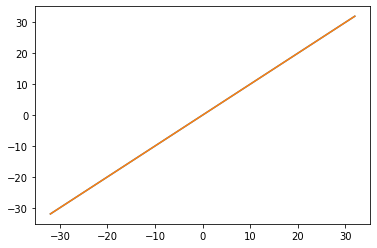

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
xmax, n = 32, 2000

x = np.linspace(-xmax, xmax, n)
x = np.array(x)
y = np.zeros(x.size)
y = x #np.multiply(x,x)
print(y)
plt.plot(x,y)

model = keras.Sequential(
    [
        layers.Dense(1, activation="linear", name="layer1"),
        layers.Dense(1, name="layer2"),
       # layers.Dense(1, name="layer3"),
       # layers.Dense(10, activation="relu", name="layer2"),
        #layers.Dense(20, activation="relu", name="layer3"),
       # layers.Dense(20, activation="relu", name="layer4"),
        #layers.Dense(12, activation="relu", name="layer5"),
      #  layers.Dense(1, name="layer6"),
    ]
)


def lr_scheduler(epoch, lr):
    decay_rate = 0.99
    decay_step = 10
    if epoch % decay_step == 0 and epoch:
        return lr * decay_rate
    return lr

callbacks = [
    keras.callbacks.LearningRateScheduler(lr_scheduler, verbose=1)
]

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
model.fit(x, y, epochs=80, verbose=1, validation_split=0.2,callbacks=callbacks)

plt.plot(x,model.predict(x))


In [3]:
print(model.summary())
print(model.get_weights())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 1)                 2         
_________________________________________________________________
layer2 (Dense)               (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
None
[array([[0.95905393]], dtype=float32), array([0.00212575], dtype=float32), array([[1.0426944]], dtype=float32), array([-0.00221491], dtype=float32)]


## Quadratic function

intercept: [5.33866933]
slope: [[-3.95390781e-16]]


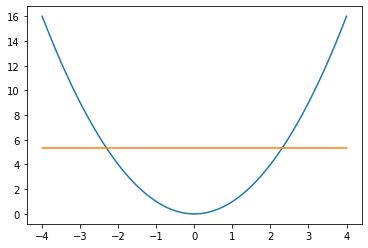

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
x=np.linspace(-4,4,2000)
x = np.array(x).reshape((-1, 1))
y = np.multiply(x,x)
#print(y)
model = LinearRegression()
model.fit(x, y)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

plt.plot(x,y)
plt.plot(x,model.predict(x))




nx=20
A=np.ones((nx,2))
help=np.linspace(-4.0, 4.0, num=nx)
A[:,0]=help
b=np.transpose(np.column_stack(np.square(np.linspace(-4.0, 4.0, num=nx))))
AB=np.matmul(A.T,b)
AA=np.matmul(A.T,A)
invAA=np.linalg.inv(AA)
#print('intercept',np.matmul(invAA,AB)[1], "slope:",np.matmul(invAA,AB)[0])


In [5]:
%matplotlib inline
import matplotlib
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import shuffle
xmax, n = 4, 2000


x = np.linspace(-xmax, xmax, n)
x = np.array(x)
y = np.zeros(x.size)
print(x.shape, y.shape)
y = np.multiply(x,x)

x, y = shuffle(x,y)
model = keras.Sequential(
    [
        layers.Dense(1, activation="linear",name="layer1"),
         layers.Dense(5, activation="relu", name="layer2"),
        layers.Dense(5, activation="relu", name="layer3"),
        #layers.Dense(1, activation="relu", name="layer2"),
        #layers.Dense(20, activation="relu", name="layer3"),
       # layers.Dense(20, activation="relu", name="layer4"),
        #layers.Dense(12, activation="relu", name="layer5"),
        layers.Dense(1, name="layer6"),
    ]
)


def lr_scheduler(epoch, lr):
    if epoch == 0:
        lr=0.05
    decay_rate = 0.99
    decay_step = 10
    if epoch % decay_step == 0 and epoch:
        return lr * decay_rate
    return lr

callbacks = [
    keras.callbacks.LearningRateScheduler(lr_scheduler, verbose=1)
]
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
model.fit(x, y, epochs=50, verbose=1, validation_split=0.2,callbacks=callbacks)


(2000,) (2000,)
Epoch 1/50

Epoch 00001: LearningRateScheduler reducing learning rate to 0.05.
50/50 [==============================] - 0s 3ms/step - loss: 19.6893 - mean_squared_error: 19.6893 - val_loss: 2.2559 - val_mean_squared_error: 2.2559
Epoch 2/50

Epoch 00002: LearningRateScheduler reducing learning rate to 0.05000000074505806.
50/50 [==============================] - 0s 1ms/step - loss: 1.5560 - mean_squared_error: 1.5560 - val_loss: 0.5859 - val_mean_squared_error: 0.5859
Epoch 3/50

Epoch 00003: LearningRateScheduler reducing learning rate to 0.05000000074505806.
50/50 [==============================] - 0s 1ms/step - loss: 0.5100 - mean_squared_error: 0.5100 - val_loss: 0.3075 - val_mean_squared_error: 0.3075
Epoch 4/50

Epoch 00004: LearningRateScheduler reducing learning rate to 0.05000000074505806.
50/50 [==============================] - 0s 1ms/step - loss: 0.3203 - mean_squared_error: 0.3203 - val_loss: 0.2543 - val_mean_squared_error: 0.2543
Epoch 5/50

Epoch 00005: 

50/50 [==============================] - 0s 1ms/step - loss: 0.2214 - mean_squared_error: 0.2214 - val_loss: 0.3470 - val_mean_squared_error: 0.3470
Epoch 35/50

Epoch 00035: LearningRateScheduler reducing learning rate to 0.048514947295188904.
50/50 [==============================] - 0s 1ms/step - loss: 0.2222 - mean_squared_error: 0.2222 - val_loss: 0.1911 - val_mean_squared_error: 0.1911
Epoch 36/50

Epoch 00036: LearningRateScheduler reducing learning rate to 0.048514947295188904.
50/50 [==============================] - 0s 1ms/step - loss: 0.1924 - mean_squared_error: 0.1924 - val_loss: 0.2215 - val_mean_squared_error: 0.2215
Epoch 37/50

Epoch 00037: LearningRateScheduler reducing learning rate to 0.048514947295188904.
50/50 [==============================] - 0s 1ms/step - loss: 0.2167 - mean_squared_error: 0.2167 - val_loss: 0.1969 - val_mean_squared_error: 0.1969
Epoch 38/50

Epoch 00038: LearningRateScheduler reducing learning rate to 0.048514947295188904.
50/50 [=============

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 1)                 2         
_________________________________________________________________
layer2 (Dense)               (None, 5)                 10        
_________________________________________________________________
layer3 (Dense)               (None, 5)                 30        
_________________________________________________________________
layer6 (Dense)               (None, 1)                 6         
Total params: 48
Trainable params: 48
Non-trainable params: 0
_________________________________________________________________
intercept [-0.32953504]
slope [[-1.4460926]]


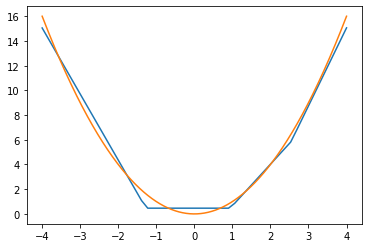

In [6]:
model.summary()
weights = model.get_weights()
#print(weights)

print("intercept",weights[1])
print("slope",weights[0])

xin=np.linspace(-4,4,50)
xin = np.array(xin).reshape((-1, 1))
yout=np.zeros(xin.shape)
for i in range(0,xin.size):
    yout[i]=model.predict(xin[i])
#print("xin",xin)
#print('yout',yout)
plt.plot(xin,yout)
x = np.linspace(-xmax, xmax, n)
x = np.array(x)
y = np.zeros(x.size)
y = np.multiply(x,x)
plt.plot(x,y)